In [1]:
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import glob
import os
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn as sb
import matplotlib.pyplot as plt

In [63]:
# script_dir =os.path.dirname(os.path.realpath(__file__)) # os.path.dirname(os.path.abspath(__file__))  # <-- absolute dir the script is in
cwd = os.getcwd()
rel_path = "Sensing"

path = os.path.join(cwd, rel_path)
print("1   ",path)
all_files = glob.glob(path + "/*.csv")

print("2  ",all_files)


1    /Users/krishnamodi/Desktop/Lab/ads1115/Sensing
2   ['/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/C10.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/C11.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/H7.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/NOISE.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/E5.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/D10.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/E4.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/I6N.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/E8.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/I9.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/H8.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/H9N.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/I11.csv', '/Users/krishnamodi/Desktop/Lab/ads1115/Sensing/I10.csv']


In [64]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0 )
    
    df['avgX']=df['X'].rolling(window=10).mean()
    df['avgY']=df['Y'].rolling(window=10).mean()
#     print(df)
    li.append(df)
    #plotting the bar chart between the quality and its count
    
#     sb.countplot(x='Label',data=df)
    
#     plt.show()


frame = pd.concat(li, axis=0, ignore_index=True)
frame = frame.dropna()
frame

,X,Y,Label,avgX,avgY
9,798,737,C10,617.2,1145.3
10,-162,1790,C10,531.2,1250.1
11,94,1992,C10,554.0,1262.1
12,1052,792,C10,642.8,1165.5
13,1471,460,C10,667.0,1146.4
14,314,1052,C10,559.0,1199.8
15,-151,2044,C10,524.4,1278.1
16,282,1393,C10,564.7,1200.4
17,1356,445,C10,653.9,1114.1
18,954,686,C10,600.8,1139.1


In [38]:
# df.drop([df.columns[1]] ,  axis='columns')
# df
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8698 entries, 9 to 8814
Data columns (total 5 columns):
X        8698 non-null int64
Y        8698 non-null int64
Label    8698 non-null object
avgX     8698 non-null float64
avgY     8698 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 407.7+ KB


In [39]:
# Loading scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

In [40]:
df2 = frame.sample(frac=1).reset_index(drop=True)

In [42]:
df2

,X,Y,Label,avgX,avgY
0,1453,-1083,E4,692.7,-410.1
1,-115,1556,Noise2,473.1,712.5
2,588,-767,H7,136.1,-279.0
3,1991,-2766,I10,1081.9,-1698.0
4,529,579,Noise2,521.1,589.5
5,-111,1608,Noise2,480.1,740.2
6,1629,250,C11,703.6,943.2
7,35,1700,NOISE,921.1,1096.2
8,1608,478,C10,733.6,1141.0
9,543,-1996,H8,-238.5,-1010.9


In [43]:
#assigning X and Y 
X = df2.values[:,0:2]
Y = df2.values[:,2]

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split

In [45]:
# from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
#splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state =50)

#scaling the data
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

/anaconda2/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda2/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [47]:
clf=RandomForestClassifier(n_estimators=50,random_state=40)


In [48]:
#using traing set data to build the model
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

In [49]:
#predicting the data
y_pred=clf.predict(X_test)

In [50]:

y_pred

array(['E4', 'C10', 'H8', ..., 'NOISE', 'D10', 'H8'], dtype=object)

In [51]:
accuracy_score(y_test,y_pred)

0.6717241379310345

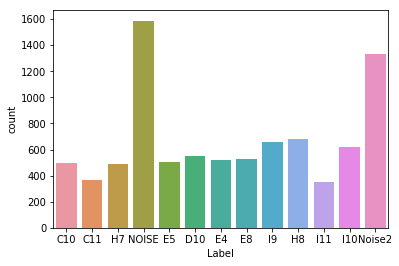

In [52]:
import seaborn as sb
#plotting the bar chart between the quality and its count
plt=sb.countplot(x='Label',data=frame)

In [53]:
from sklearn import svm

In [54]:
clf_svm = svm.SVC(gamma='scale')

In [55]:
 clf_svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
y_pred_svm=clf_svm.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred_svm)

0.6275862068965518

In [58]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [59]:
y_pred_lin_clf=lin_clf.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred_lin_clf)

0.45839080459770115